In [1]:
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal

Using `gdal` we can read/open the DEM.asc file and extract the data as an array and use the geo infos to calculate the bounding box.

In [2]:
ds=gdal.Open('DEM.asc')
gt = ds.GetGeoTransform()
print(gt)

(319370.82896, 91.66670000000005, 0.0, 5240788.834227, 0.0, -91.66670000000005)


In [3]:
Zarray=ds.ReadAsArray()
print(np.shape(Zarray))

(180, 98)


## 1
Now using `imshow()` we can plot the array. Since we are plotting an array, the origin is on the upper left corner. The image is shown rows and lines coordinates.

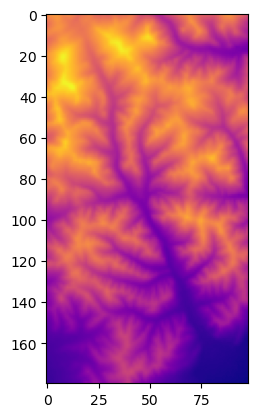

In [4]:
plt.figure()
plt.imshow(Zarray, cmap='plasma')
plt.show()

## 2
Then we can calculate the bounding box (min, max, min, ymax) and use it in `imshow()` such as

In [5]:
nbx=np.shape(Zarray)[1]
nby=np.shape(Zarray)[0]
xmin=gt[0]
xmax=xmin+(gt[1]*nbx)    
ymax=gt[3]    
ymin=ymax+(gt[5]*nby) 

limsbox=[xmin,xmax,ymin,ymax]

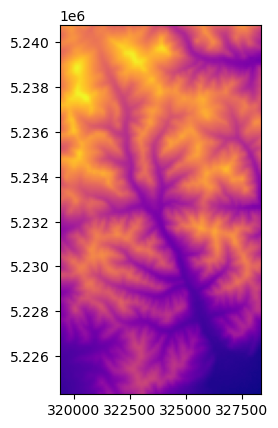

In [6]:
plt.figure()
plt.imshow(Zarray, cmap='plasma', extent=limsbox)
plt.show()

Now, the image "has moved" toward this new reference and we can plot any point with coordinates corresponding to this bounding box

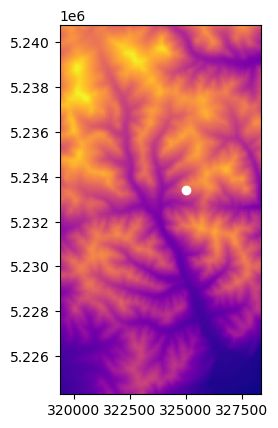

In [7]:
plt.figure()

plt.imshow(Zarray, cmap='plasma', extent=limsbox)

plt.plot(325000, 5233400, 'ow')


plt.show()